In [22]:
! pip install kaggle

In [23]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [24]:
! cp kaggle.json ~/.kaggle/

In [25]:
! chmod 600 ~/.kaggle/kaggle.json

In [26]:
! kaggle datasets download jeffheaton/glasses-or-no-glasses --force

100% 6.10G/6.11G [00:45<00:00, 164MB/s]
100% 6.11G/6.11G [00:46<00:00, 142MB/s]


In [27]:
! unzip glasses-or-no-glasses.zip

Streaming output truncated to the last 5000 lines.
  inflating: faces-spring-2020/faces-spring-2020/face-1000.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1001.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1002.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1003.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1004.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1005.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1006.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1007.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1008.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1009.png  
  inflating: faces-spring-2020/faces-spring-2020/face-101.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1010.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1011.png  
  inflating: faces-spring-2020/faces-spring-2020/face-1012.png  
  inflating: faces-spring-2020/faces-spr

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from PIL import ImageEnhance
import os

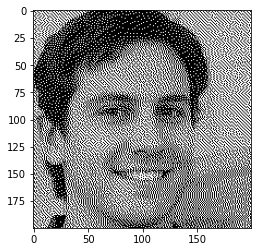

(40000,)

In [29]:
# example image
im = Image.open("faces-spring-2020/faces-spring-2020/face-1.png", "r")
newSize = (200, 200)
im = im.resize(newSize)
im = im.convert('L') # convert image to monochrome - this works
im = im.convert('1')
imgplot = plt.imshow(im)
plt.show()

pix_val = np.array(list(im.getdata()))

pix_val.shape

In [30]:
# assign directory
directory = 'faces-spring-2020/faces-spring-2020'
image_names = []
# iterate over files in
# that directory
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        image_names.append(f)

print(image_names)

['faces-spring-2020/faces-spring-2020/face-3760.png', 'faces-spring-2020/faces-spring-2020/face-3405.png', 'faces-spring-2020/faces-spring-2020/face-4947.png', 'faces-spring-2020/faces-spring-2020/face-2324.png', 'faces-spring-2020/faces-spring-2020/face-3573.png', 'faces-spring-2020/faces-spring-2020/face-4695.png', 'faces-spring-2020/faces-spring-2020/face-3510.png', 'faces-spring-2020/faces-spring-2020/face-2419.png', 'faces-spring-2020/faces-spring-2020/face-2731.png', 'faces-spring-2020/faces-spring-2020/face-1431.png', 'faces-spring-2020/faces-spring-2020/face-1382.png', 'faces-spring-2020/faces-spring-2020/face-2509.png', 'faces-spring-2020/faces-spring-2020/face-1953.png', 'faces-spring-2020/faces-spring-2020/face-1373.png', 'faces-spring-2020/faces-spring-2020/face-4146.png', 'faces-spring-2020/faces-spring-2020/face-1178.png', 'faces-spring-2020/faces-spring-2020/face-490.png', 'faces-spring-2020/faces-spring-2020/face-4688.png', 'faces-spring-2020/faces-spring-2020/face-2689

In [31]:
new_im_dimension = 200
images = np.zeros([len(image_names), new_im_dimension**2,])

newSize = (new_im_dimension, new_im_dimension)
for idx in range(len(image_names)):
  im = Image.open(image_names[idx], "r")
  im = im.resize(newSize)

  im = im.convert('L') # convert image to monochrome - this works
  im = im.convert('1')

  pix_val = np.array(list(im.getdata()))
  images[idx] = pix_val

print(images)


[[  0.   0.   0. ... 255.   0. 255.]
 [255.   0. 255. ...   0.   0.   0.]
 [  0.   0.   0. ... 255.   0. 255.]
 ...
 [  0. 255.   0. ... 255. 255. 255.]
 [255.   0. 255. ...   0.   0.   0.]
 [  0. 255.   0. ... 255.   0.   0.]]


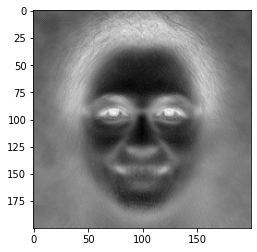

In [32]:
# average face
theta_MLE = np.mean(images, axis = 0)
theta_MLE = theta_MLE.reshape(new_im_dimension,new_im_dimension)*255
plt.imshow(theta_MLE, cmap = plt.cm.binary)


In [33]:
def calcSqDistances(X, Kmus):
    #for each image (784d vector), the square distance will be each pixel - mean pixel
    N = X.shape[0] # number of images/vectors
    K = Kmus.shape[0] # number of clusters
    sqDmat = np.zeros((N,K), dtype = np.float32)
    for i in range(N):
        for j in range(K):
            sqDmat[i,j] = np.sum(np.square(np.subtract(X[i], Kmus[j])))
    return sqDmat

In [34]:
def determineRnk(sqDmat):
    m = np.argmin(sqDmat, axis = 1)
    return np.eye(sqDmat.shape[1])[m]

In [35]:
def recalcMus(X, Rnk):
    return np.divide(X.T @ Rnk, np.sum(Rnk, axis = 0)).T

In [36]:
def runKMeans(K, images):
    X = images
    N, D = X.shape
    Kmus = np.zeros((K, D))
    
    
    rand_inds = np.random.permutation(N)
    Kmus = X[rand_inds[0:K],:]
    
    maxiters = 1000
    
    for iter in range(maxiters):
        
        sqDmat = calcSqDistances(images, Kmus)
        rnk = determineRnk(sqDmat)
        
        KmusOld = Kmus
        Kmus = recalcMus(X, rnk)
        
        if np.sum(np.abs(KmusOld.reshape((-1, 1)) - Kmus.reshape((-1, 1)))) < 1e-6:
            print(iter)
            return Kmus
            break

In [37]:
Kmus_10 = runKMeans(20, images)

25


In [38]:
def get_cluster_plot(Kmus, subplots): 
    '''
    : get a plot of what different clusters represent
    : takes as input the cluster location matrix
    '''
    fig,axs = plt.subplots(subplots,5, figsize = (15,8))
    fig.tight_layout()
    for i in range(len(Kmus)):
        cluster = Kmus[i].reshape(new_im_dimension,-1) * 255
        axs[i//5][i%5].imshow(cluster, cmap = plt.cm.binary)
        axs[i//5][i%5].set_title(f'Cluster {i + 1}')

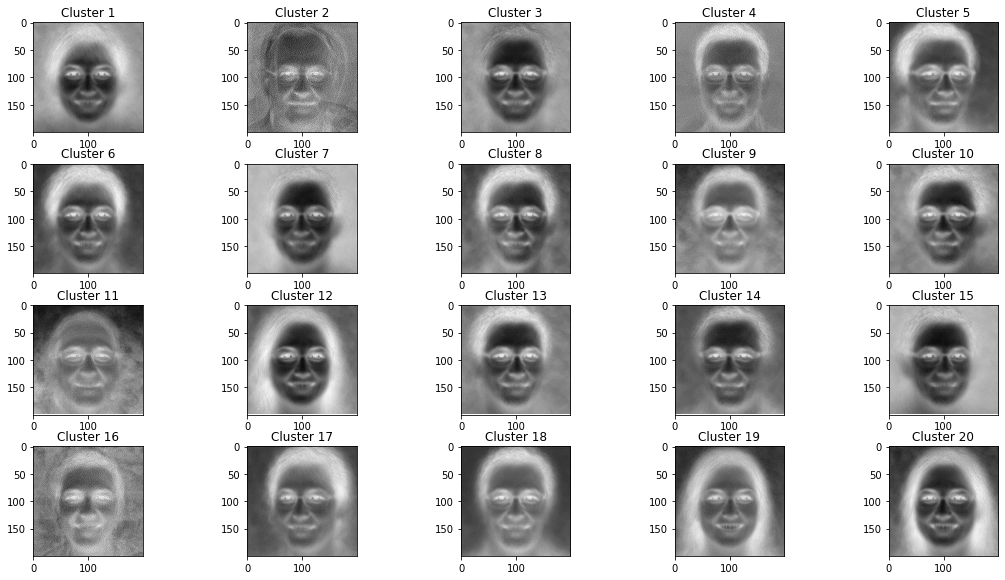

In [39]:
get_cluster_plot(Kmus_10,4)

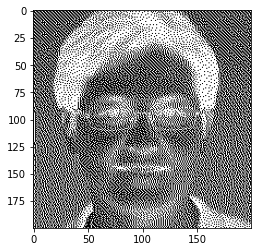

In [40]:
test_im = images[1].reshape(new_im_dimension,new_im_dimension)*255
plt.imshow(test_im, cmap = plt.cm.binary)

In [41]:
mean_subtracted = images - theta_MLE.reshape(-1)
U, Sigma, VT = np.linalg.svd(mean_subtracted, full_matrices=False)


In [90]:
num_components = 10 # Number of principal components
Y = np.matmul(mean_subtracted, VT[:num_components,:].T)


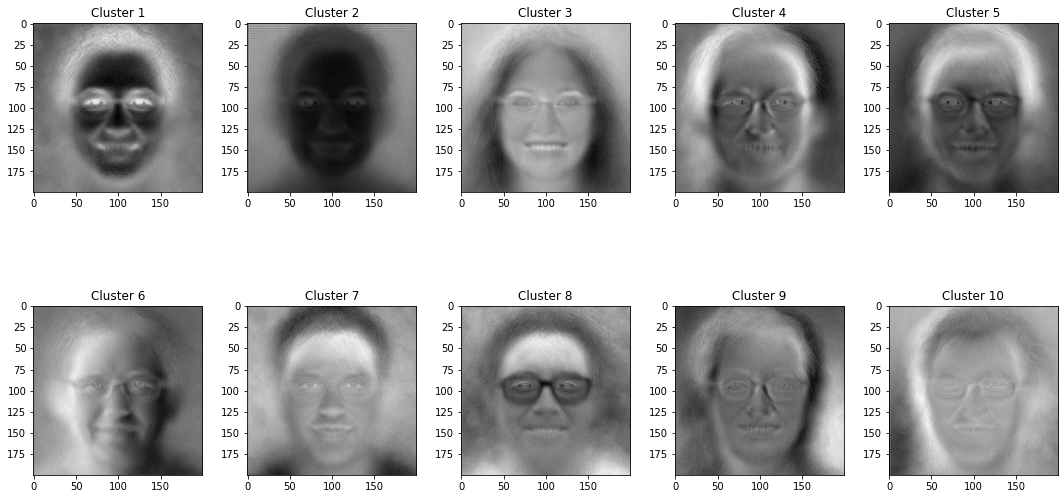

In [43]:
get_cluster_plot(VT[0:10], 2)

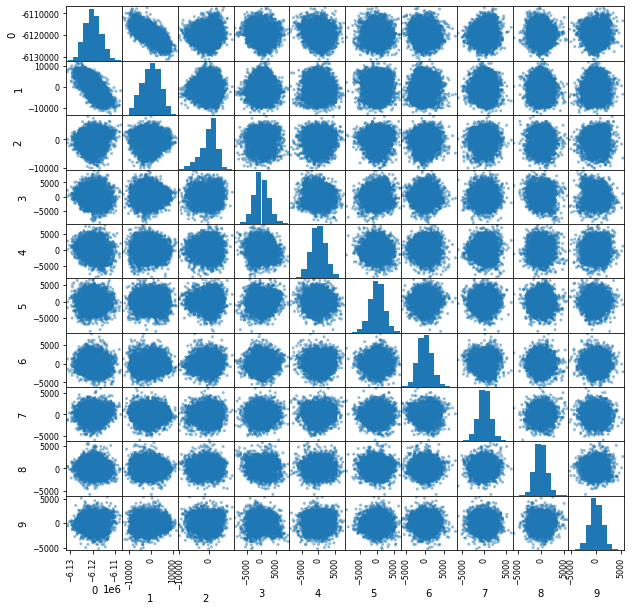

In [44]:
import pandas as pd
df = pd.DataFrame(Y)
sm = pd.plotting.scatter_matrix(df, figsize = (10,10))

Text(0, 0.5, 'Eigenvalue')

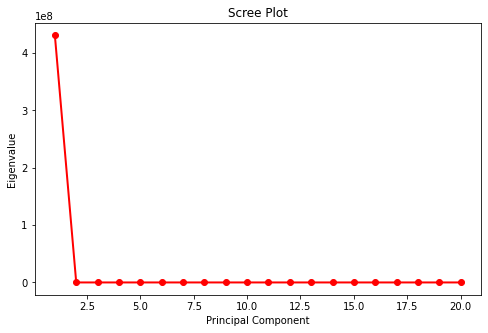

In [45]:
eigvals = Sigma[0:20]**2 / np.cumsum(Sigma[0:20])[-1]

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(len(eigvals[0:20])) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

Text(0, 0.5, 'Eigenvalue')

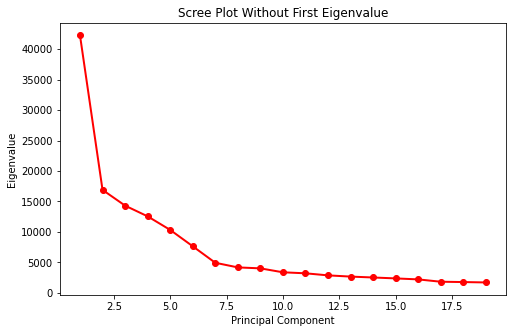

In [46]:
eigvals = Sigma[1:20]**2 / np.cumsum(Sigma[1:20])[-1]

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(len(eigvals[0:20])) + 1
plt.plot(sing_vals, eigvals, 'ro-', linewidth=2)
plt.title('Scree Plot Without First Eigenvalue')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')

In [94]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# will need later for calculations
mean_vector = np.mean(Y, axis = 0)
covariance_matrix = np.cov(Y,bias = True)

# split dataset into cluster
class Gaussian_Mixture_Model:
    def __init__(self, n_components, max_iterations = 100, component_string = None):
        self.n_components = n_components # number of clusters
        self.max_iterations = max_iterations # maximum iterations algorithm uses
        if component_string == None:
            self.component_string = [f"component{index}" for index in 
                                    range(self.n_components)]
        else:
            self.component_string = component_string
            # pi array for part of data in each cluster
            self.pi = [1/self.n_components for component in range(self.n_components)]

    # fit function so EM-algorithm runs; find mean vectors and covariance matrices
    def fit(self, Y):
        #split data into sub-sets based on n_components
        Y_subset = np.array_split(Y, self.n_components)
        # initial covariance matrix and mean vector
        self.covariance_matrices = [np.cov(y.T) for y in Y_subset]
        self.mean_vector = [np.mean(y, axis = 0) for y in Y_subset]

    def E_step(self, Y): # E step
      for iteration in range(self.max_iterations): 
    #probabilities for every cluster contained in every row
        self.r = np.zeros((len(Y), self.n_components))
    # calculate r matrix by doing the estimation part of the EM algorithm
      for n in range(len(Y)):
        for val in range(self.n_components):
            self.r[n][val] = self.pi[val] * self.normal_multivariate(Y[n], self.mean_vector[val],
                                                                     self.covariance_matrices[val])
            self.r[n][val] /= sum([self.pi[col] * self.normal_multivariate(Y[n], self.mean_vector[col],
                                                                          self.covariance_matrices[col]) for col in range(self.n_components)])
            #calculate N list: sum of columns in r matrix
            N = np.sum(self.r, axis = 0)

    def normal_multivariate(self, Y, mean_vector, covariance_matrix):
        return (2*np.pi)**(-len(Y)/2) * np.linalg.det(covariance_matrix)**(-1/2) * np.exp(-np.dot(np.dot((Y - mean_vector).T,
                                                                                                    np.linalg.inv(covariance_matrix)),
                                                                                                  (Y - mean_vector))/2)
    
    def M_step(self, Y, N): # initialize mean vector; M step
      self.mean_vector = np.zeros((self.n_components, len(Y[0])))
      # for loop to update
      for val in range(self.n_components):
        for n in range(len(Y)):
            self.mean_vector[val] += self.r[n][val] * Y[n]
            self.mean_vector = [1/N[val] * self.mean_vector[val] for val in range(self.n_components)]
    # list of covariance matrices
      self.covariance_matrices = [np.zeros((len(Y[0])), len(Y[0])) for val in range(self.n_components)]
    # for loop to update
      for val in range(self.n_components):
        self.covariance_matrices[val] = np.cov(Y.T, aweights = (self.r[:, val]), ddof = 0)
        self.covariance_matrices = [1/N[val] * self.covariance_matrices[val] for val in range(self.n_components)]
        # apply to pi list
        self.pi = [N[val]/len(Y) for val in range(self.n_components)]
    
    
    # GMM prediction function
    def predict_GMM(self, Y):
      probs = []
      for val in range(self.n_components):
        for n in range(len(Y)):
          probs.append([self.normal_multivariate(Y[n], self.mean_vector[val], 
                                                 self.covariance_matrices[val]) for k in range(self.n_components)])
          cluster = []
          for point in probs:
              cluster.append(self.component_string[point.index(max(point))])
              return cluster
    
    # graph function
    def GMM_graph(self, Y, var):
      var = self.predict_GMM(Y)
      plt.figure( figsize=(16,12))
      plt.scatter(Y[:,0], Y[:,1], c = var, edgecolor='black', lw=1.5, s=100, cmap=plt.get_cmap('viridis'))
      graph = plt.show()
      return graph

#function to run them all
    def run_GMM(self, Y):
      self.fit(Y)
      self.E_step(Y)
      self.M_step(Y, N = np.sum(self.r, axis = 0))
      self.predict_GMM(Y)
      self.GMM_graph(Y)

